In [1]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_shape = train_images.shape
train_images.shape

(60000, 28, 28)

In [4]:
names =	['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
def show_image(im):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [6]:
def show_image_label(im,value,names):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the fashion is ",names[value])

In [7]:
def show_image_vpp(im,value,prediction,probability):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",names[value])
  print("The predicted value is ",names[prediction]," with probability: ",probability)

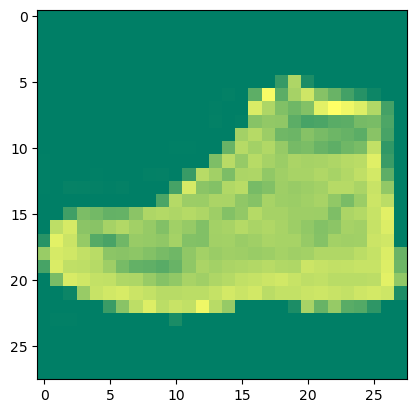

the fashion is  Ankle boot


In [8]:
show_image_label(test_images[28],test_labels[28],names)

# Define a function to build a model

In [9]:
def build_model(input_shape):
    input = keras.Input(shape=(input_shape[1],input_shape[2],input_shape[3]))
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.Flatten()(x)
    output = layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs=input,outputs=output)
    return model

# Define a function to train a model

In [10]:
def train_model(model,train_tensors,train_labels,nb_epochs):
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=nb_epochs)

# Define a function to predict the fashion type and the probability of the prediction

In [11]:
def predict(model,test_tensors):
    predictions = model.predict(test_tensors)
    digit_predictions = np.argmax(predictions, axis=1)  # Extract class with highest probability
    digit_probability = np.max(predictions, axis=1)  # Extract the highest probability per prediction
    return digit_predictions,digit_probability

# Define the training and validation tensors

In [12]:
test_shape = test_images.shape
train_tensors = train_images.reshape((train_shape[0], train_shape[1], train_shape[2], 1)).astype("float32") / 255
test_tensors = test_images.reshape((test_shape[0], test_shape[1], test_shape[2], 1)).astype("float32") / 255

# Build the model

In [13]:
model = build_model(train_tensors.shape)

# Print a summary of the model

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

# Train the model

In [15]:
train_model(model,train_tensors,train_labels,10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4677 - accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3089 - accuracy: 0.8876
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2658 - accuracy: 0.9030
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2431 - accuracy: 0.9126
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2273 - accuracy: 0.9176
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2138 - accuracy: 0.9236
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2056 - accuracy: 0.9266
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1986 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1935 - accuracy: 0.9319
Epoch 10/10
1875/1875 [==============================] - 21s 11m

# Evaluate how good the model is on the testing data

In [16]:
test_loss, test_accuracy = model.evaluate(test_tensors, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 3s 6ms/step - loss: 0.3069 - accuracy: 0.9027
Test Accuracy: 0.9027


# Get the predictions and their probabilities on the testing data set

In [17]:
pred_labels, pred_probabilities = predict(model, test_tensors)

313/313 [==============================] - 2s 4ms/step


# Show the first 10 test images and their predictions with probabilities

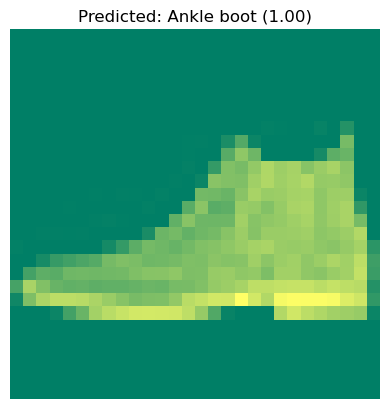

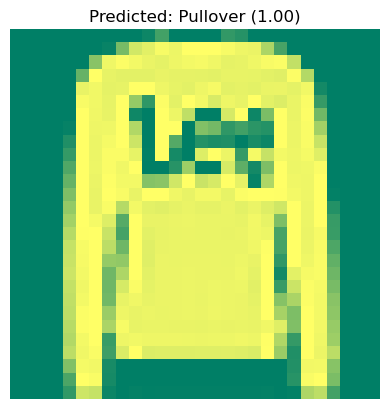

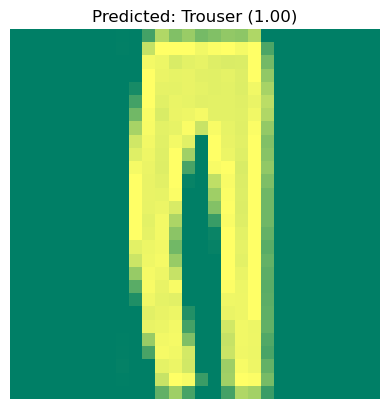

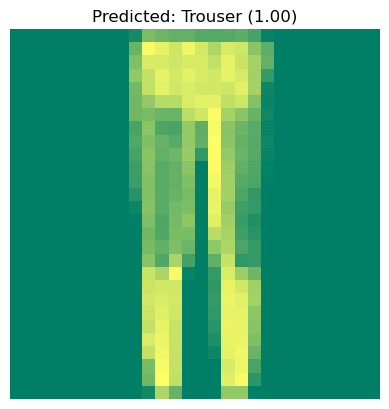

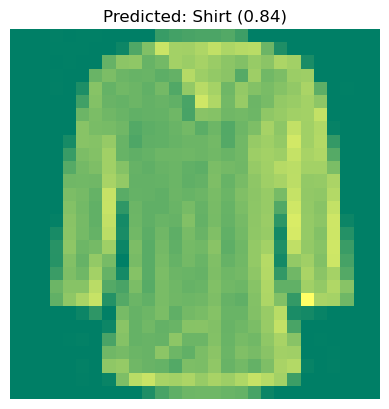

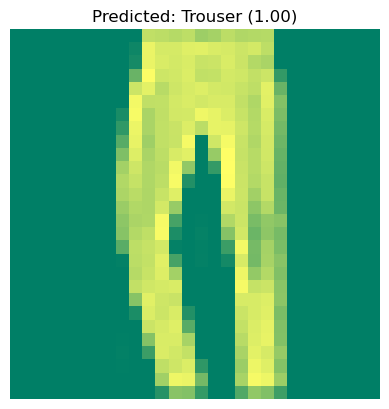

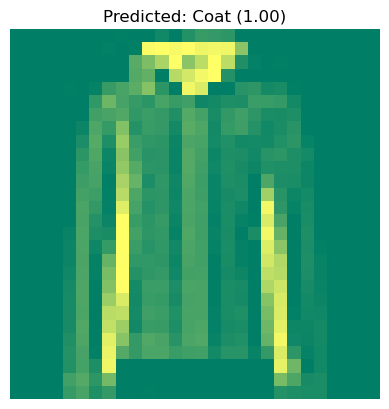

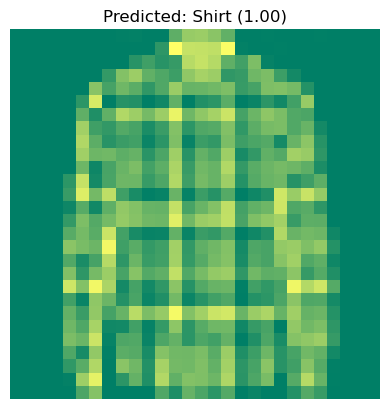

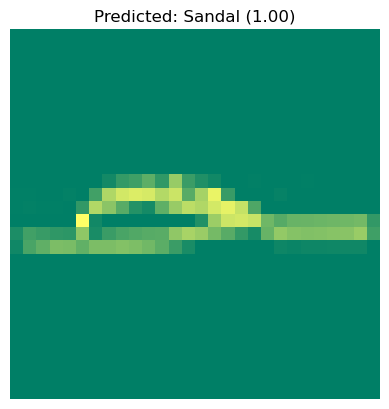

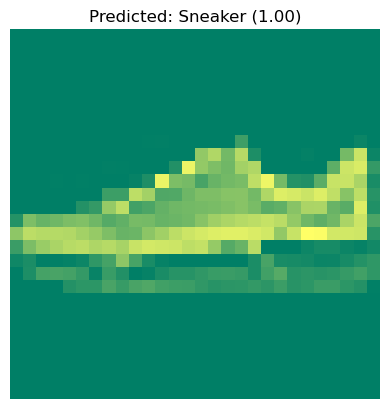

In [18]:
for i in range(10):
    plt.imshow(test_images[i], cmap=plt.cm.summer)
    plt.title(f"Predicted: {names[pred_labels[i]]} ({pred_probabilities[i]:.2f})")
    plt.axis("off")
    plt.show()


# Compute the number of wrong predictions

In [19]:
wrong_indices = np.where(pred_labels != test_labels)[0]
print(f"Number of wrong predictions: {len(wrong_indices)}")

Number of wrong predictions: 973


# Show the first 10 testing images with a wrong prediction

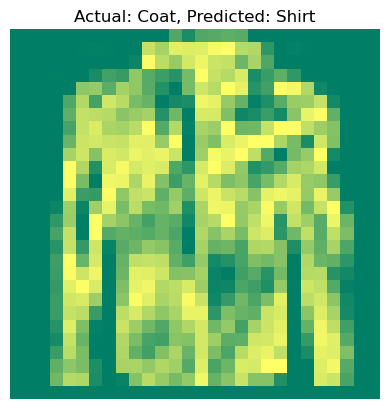

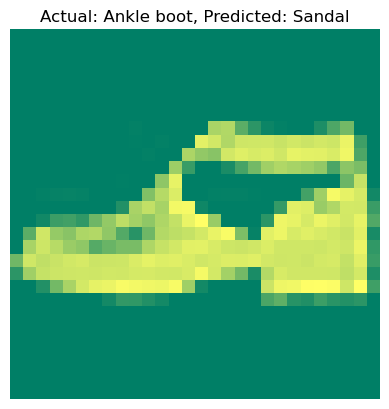

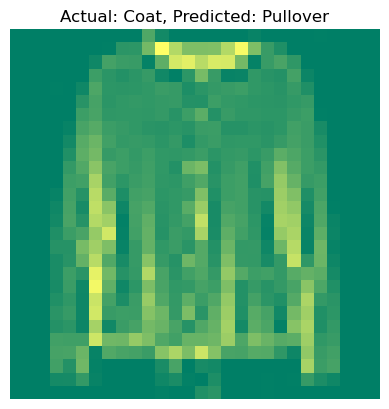

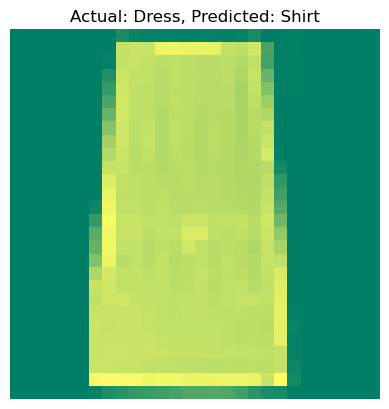

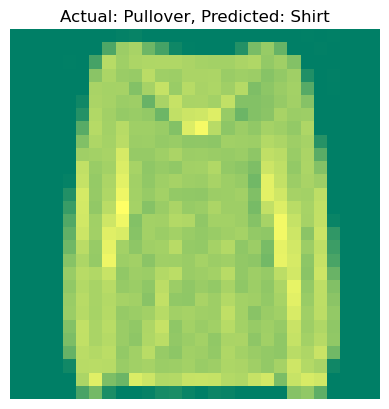

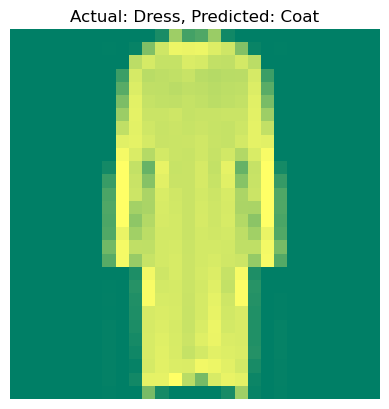

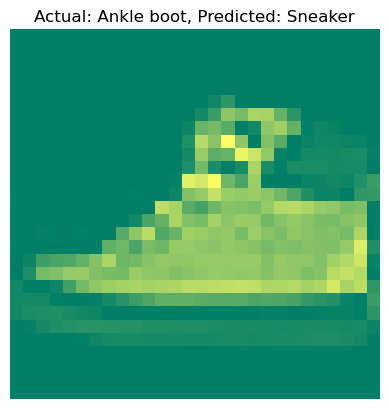

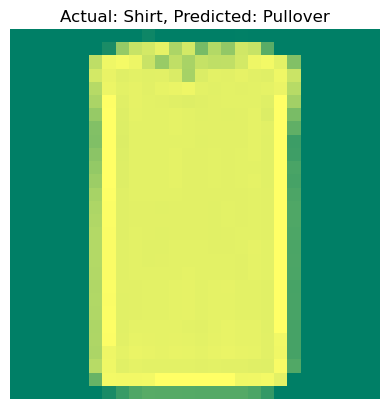

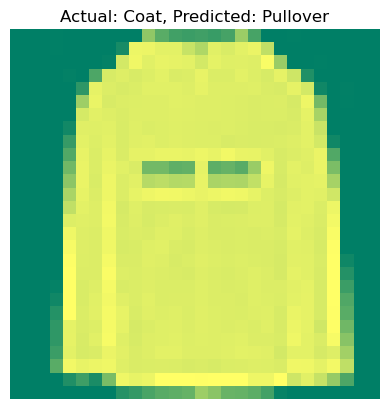

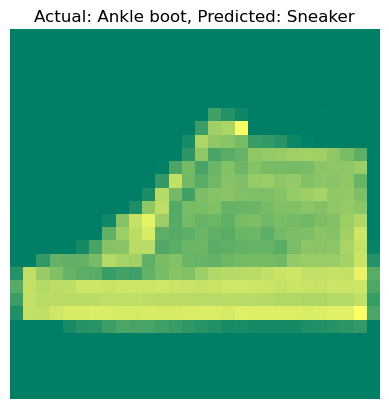

In [20]:
for i in range(min(10, len(wrong_indices))):
    idx = wrong_indices[i]
    plt.imshow(test_images[idx], cmap=plt.cm.summer)
    plt.title(f"Actual: {names[test_labels[idx]]}, Predicted: {names[pred_labels[idx]]}")
    plt.axis("off")
    plt.show()